# Klasifikasi 

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score ,precision_score,recall_score,f1_score, ConfusionMatrixDisplay

In [48]:
nama_file = 'registrasi3.xlsx'
dataset = pd.read_excel(nama_file)
print(dataset)

     Umur  SHIFT Jenis Pasien Jenis Pemeriksaan Detil Pemeriksaan  \
0      48   PAGI         BARU               USG    ABD ATAS BAWAH   
1      54   PAGI         BARU               USG    ABD ATAS BAWAH   
2      51   PAGI         BARU           RONTGEN            THORAX   
3      53   PAGI         BARU               USG    ABD ATAS BAWAH   
4      55   PAGI         BARU               USG    ABD ATAS BAWAH   
..    ...    ...          ...               ...               ...   
110    23   SORE         BARU           RONTGEN            THORAX   
111    23   SORE         BARU           RONTGEN               BOF   
112    72  MALAM         BARU           CT SCAN            KEPALA   
113     5   SORE         BARU           RONTGEN            THORAX   
114    13  MALAM         BARU           RONTGEN            THORAX   

    Jenis Pembayaran  Waktu Tunggu   
0                IKS             24  
1                KES             24  
2                IKS             20  
3               UMU

In [49]:
# Mengubah data menjad bentuk numerik
dataset['SHIFT'].replace({'':0, 'PAGI':1, 'SORE':2, 'MALAM':3}, inplace=True)
dataset['Jenis Pasien'].replace({'':0, 'BARU':1, 'LAMA':2}, inplace=True)
dataset['Jenis Pemeriksaan'].replace({'':0, 'USG':1, 'RONTGEN':2, 'CT SCAN':3}, inplace=True)
dataset['Detil Pemeriksaan'].replace({'':0, 'ABD ATAS BAWAH':1, 'THORAX':2, 'GENU':3, 'KONTROL HAMIL':4, 'MANUS':5, 'ELBOW':6, 'THYROID':7, 'KANDUNGAN':8, 'LS':9, 'CRURIS':10, 'PEDIS':11, 'PELVIS':12, 'KEPALA':13, 'WRIST':14, 'COCCYGEUS':15, 'TVS':16, 'STONO':17, 'BOF':18}, inplace=True)
dataset['Jenis Pembayaran'].replace({'':0, 'IKS':1, 'UMUM':2, 'KES':3}, inplace=True)
dataset

,Umur,SHIFT,Jenis Pasien,Jenis Pemeriksaan,Detil Pemeriksaan,Jenis Pembayaran,Waktu Tunggu
0,48,1,1,1,1,1,24
1,54,1,1,1,1,3,24
2,51,1,1,2,2,1,20
3,53,1,1,1,1,2,23
4,55,1,1,1,1,3,23
...,...,...,...,...,...,...,...
110,23,2,1,2,2,3,32
111,23,2,1,2,18,2,28
112,72,3,1,3,13,2,44
113,5,2,1,2,2,2,36


In [50]:
# # Mendeteksi missing value
# if dataset.isna().values.any():
#     print("Missing value:\n")
#     print(dataset.isna().any())
# else:
#     print("tidak ada missing value\n")
# print("")
dataset.isnull().sum()

Umur                 0
SHIFT                0
Jenis Pasien         0
Jenis Pemeriksaan    0
Detil Pemeriksaan    0
Jenis Pembayaran     0
Waktu Tunggu         0
dtype: int64

In [51]:
# Mengganti dataset rata-rata
mean = dataset.mean()
missingValue = dataset.fillna(mean)
missingValue

,Umur,SHIFT,Jenis Pasien,Jenis Pemeriksaan,Detil Pemeriksaan,Jenis Pembayaran,Waktu Tunggu
0,48,1,1,1,1,1,24
1,54,1,1,1,1,3,24
2,51,1,1,2,2,1,20
3,53,1,1,1,1,2,23
4,55,1,1,1,1,3,23
...,...,...,...,...,...,...,...
110,23,2,1,2,2,3,32
111,23,2,1,2,18,2,28
112,72,3,1,3,13,2,44
113,5,2,1,2,2,2,36


### Mengubah menjadi ordinal

In [52]:
# Create a Pandas Series with interval data.
series = pd.Series(dataset['Waktu Tunggu '])

# Convert the interval data to ordinal data using the pd.cut() function with 3 bins.
ordinal_data = pd.cut(series, bins=[3, 21, 33, 59], labels=[0, 1, 2])
# Print the ordinal data.
print(ordinal_data)

0      1
1      1
2      0
3      1
4      1
      ..
110    1
111    1
112    2
113    2
114    2
Name: Waktu Tunggu , Length: 115, dtype: category
Categories (3, int64): [0 < 1 < 2]


### Data Training

In [53]:
# Data Training
X= dataset[['Jenis Pemeriksaan', 'SHIFT', 'Jenis Pasien', 'Detil Pemeriksaan']]
X

,Jenis Pemeriksaan,SHIFT,Jenis Pasien,Detil Pemeriksaan
0,1,1,1,1
1,1,1,1,1
2,2,1,1,2
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
110,2,2,1,2
111,2,2,1,18
112,3,3,1,13
113,2,2,1,2


#### Menggabungkan data

In [54]:
# Menggabungkan data
dataset = dataset.assign(Range_Waktu_tunggu=ordinal_data)
print(dataset)

     Umur  SHIFT  Jenis Pasien  Jenis Pemeriksaan  Detil Pemeriksaan  \
0      48      1             1                  1                  1   
1      54      1             1                  1                  1   
2      51      1             1                  2                  2   
3      53      1             1                  1                  1   
4      55      1             1                  1                  1   
..    ...    ...           ...                ...                ...   
110    23      2             1                  2                  2   
111    23      2             1                  2                 18   
112    72      3             1                  3                 13   
113     5      2             1                  2                  2   
114    13      3             1                  2                  2   

     Jenis Pembayaran  Waktu Tunggu  Range_Waktu_tunggu  
0                   1             24                  1  
1                  

In [55]:
# Cek null dataset
is_nan = dataset.isna()
print(is_nan)

      Umur  SHIFT  Jenis Pasien  Jenis Pemeriksaan  Detil Pemeriksaan  \
0    False  False         False              False              False   
1    False  False         False              False              False   
2    False  False         False              False              False   
3    False  False         False              False              False   
4    False  False         False              False              False   
..     ...    ...           ...                ...                ...   
110  False  False         False              False              False   
111  False  False         False              False              False   
112  False  False         False              False              False   
113  False  False         False              False              False   
114  False  False         False              False              False   

     Jenis Pembayaran  Waktu Tunggu   Range_Waktu_tunggu  
0               False          False               False  
1    

### Data Testing

In [56]:
# Data Testing
y = dataset['Range_Waktu_tunggu']
y

0      1
1      1
2      0
3      1
4      1
      ..
110    1
111    1
112    2
113    2
114    2
Name: Range_Waktu_tunggu, Length: 115, dtype: category
Categories (3, int64): [0 < 1 < 2]

### Data training dan testing

In [57]:
# Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Desicion Tree

In [58]:
# Desicion Tree
print("Decision Tree")
Decision = DecisionTreeClassifier(random_state=0)
Decision.fit(X_train, y_train)
y_predictionDT = Decision.predict(X_test)
accuracy_DT = round(accuracy_score(y_test, y_predictionDT)* 100, 2)
acc_DecisionDT = round(Decision.score(X_train, y_train)* 100, 2)
print("Prediksi Decision Tree : ", y_predictionDT)

Decision Tree
Prediksi Decision Tree :  [0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 1 0 2 0 0]


In [59]:
# Confusion Matrix Decision Tree
CMDT = confusion_matrix(y_test, y_predictionDT)
accuracyDT = accuracy_score(y_test, y_predictionDT)
precisionDT = precision_score(y_test, y_predictionDT, average='macro')
recallDT = recall_score(y_test, y_predictionDT, average='macro')
f1DT = f1_score(y_test, y_predictionDT, average='macro')

TNDT = CMDT[1][1] * 1.0
FNDT = CMDT[1][0] * 1.0
TPDT = CMDT[0][0] * 1.0
FPDT = CMDT[0][1] * 1.0
total = TNDT + TPDT + FPDT + FNDT
sensitivityDT = TNDT / (TNDT + FPDT)* 100
specificityDT = TPDT / (TPDT + FNDT)* 100

print("Akurasi Decision Tree: ", accuracyDT * 100, "%")
print("Recall Decision Tree: ", recallDT * 100, "%")
print("Precision Decision Tree: ", + precisionDT)


Akurasi Decision Tree:  86.95652173913044 %
Recall Decision Tree:  71.11111111111111 %
Precision Decision Tree:  0.9444444444444445


Confusion matrix for Decision Tree
 [[15  0  0]
 [ 2  1  0]
 [ 1  0  4]]


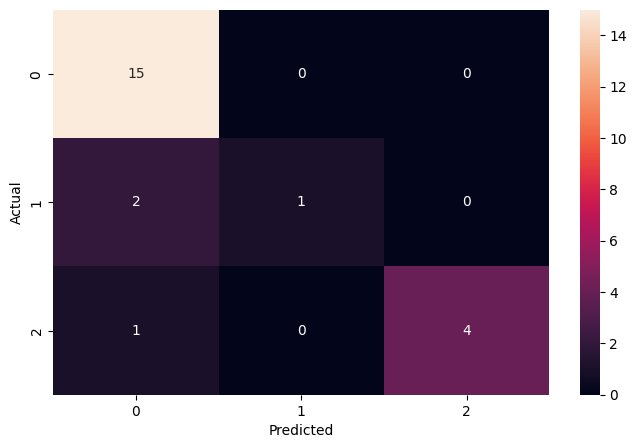

In [60]:
# Menampilkan Confusion Matrix Decision Tree
cm_displayDT=ConfusionMatrixDisplay(confusion_matrix=CMDT)
print('Confusion matrix for Decision Tree\n',CMDT)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predictionDT), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Visualisasi Decision Tree

c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


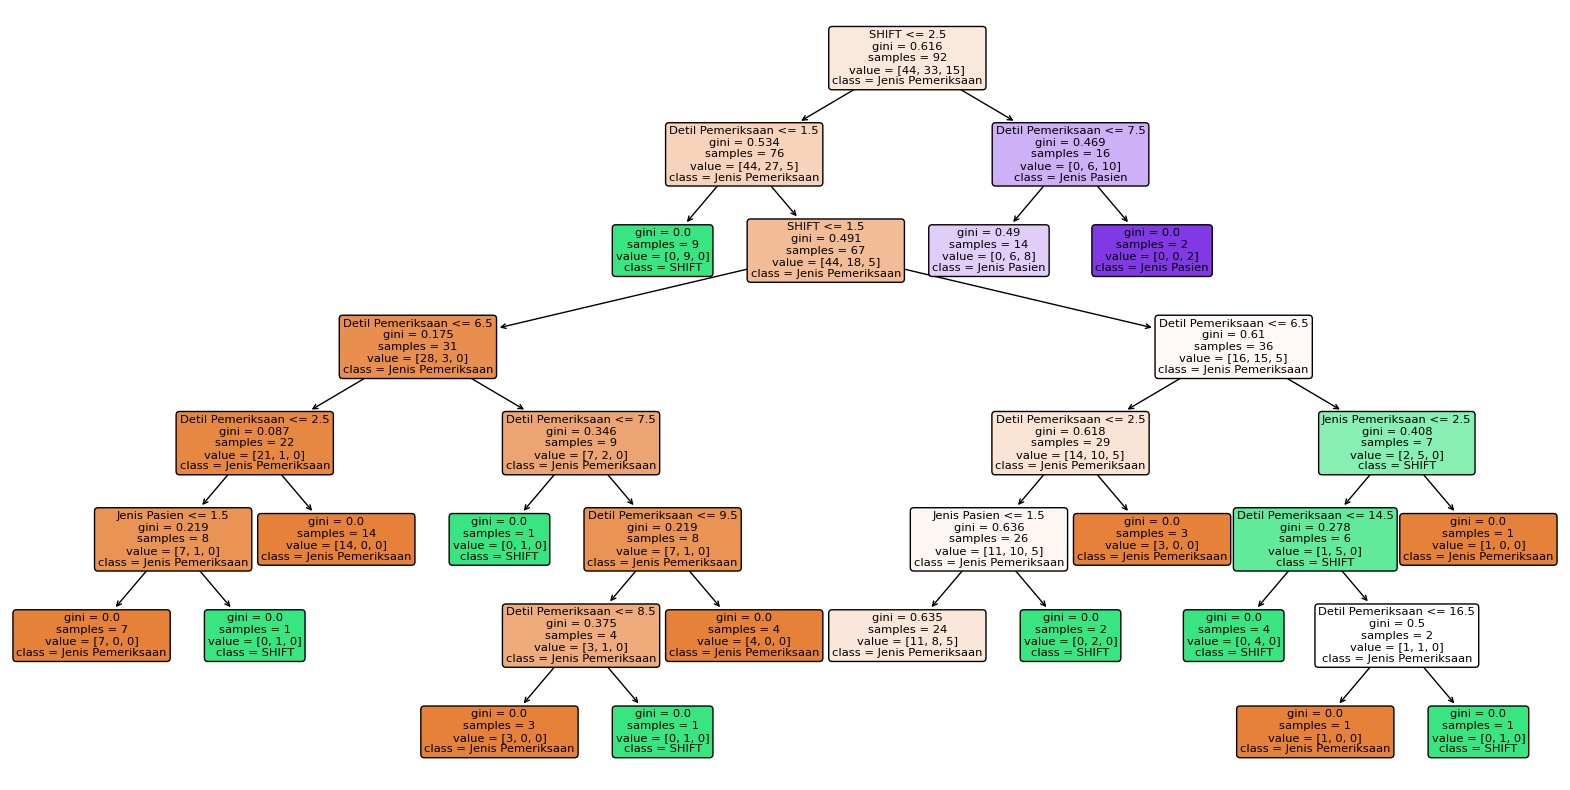

In [94]:
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

columns = ['Jenis Pemeriksaan', 'SHIFT', 'Jenis Pasien', 'Detil Pemeriksaan']


# Load the pre-trained Random Forest model from a pickle file
dt_model = pickle.load(open('kategori_tunggu.sav', 'rb'))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=columns, class_names=columns, filled=True, rounded=True)
plt.show()

### Support Vector Machine

In [95]:
# SVM
print("Support Vector Machine")
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
y_prediction_svm = svm_model.predict(X_test)
accuracy_svm = round(accuracy_score(y_test, y_prediction_svm) * 100, 2)
acc_decision_svm = round(svm_model.score(X_train, y_train) * 100, 2)
print("Prediction SVM: ", y_prediction_svm)

Support Vector Machine
Prediction SVM:  [0 0 1 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0]


In [96]:
# Confusion Matrix SVM
CMSVM = confusion_matrix(y_test, y_prediction_svm)
accuracy_svm = accuracy_score(y_test, y_prediction_svm)
precision_svm = precision_score(y_test, y_prediction_svm, average='macro')
recall_svm = recall_score(y_test, y_prediction_svm, average='macro')
f1_svm = f1_score(y_test, y_prediction_svm, average='macro')

TNSVM = CMSVM[1][1] * 1.0
FNSVM = CMSVM[1][0] * 1.0
TPSVM = CMSVM[0][0] * 1.0
FPSVM = CMSVM[0][1] * 1.0
total_svm = TNSVM + TPSVM + FPSVM + FNSVM
sensitivity_svm = TNSVM / (TNSVM + FPSVM) * 100
specificity_svm = TPSVM / (TPSVM + FNSVM) * 100

print("Accuracy SVM: ", accuracy_svm * 100, "%")
print("Recall SVM: ", recall_svm * 100, "%")
print("Precision SVM: ", +precision_svm)

Accuracy SVM:  78.26086956521739 %
Recall SVM:  57.777777777777786 %
Precision SVM:  0.5925925925925926


Confusion matrix for SVM
 [[14  1  0]
 [ 3  0  0]
 [ 1  0  4]]


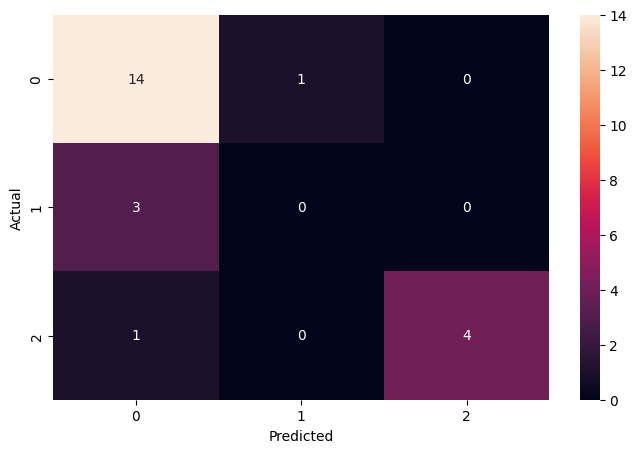

In [97]:
# Display Confusion Matrix SVM
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=CMSVM)
print('Confusion matrix for SVM\n', CMSVM)
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_prediction_svm), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Logistic Regression

In [98]:
# Logistic Regression
print("Logistic Regression")
logreg_model = LogisticRegression(random_state=0)
logreg_model.fit(X_train, y_train)
y_prediction_logreg = logreg_model.predict(X_test)
accuracy_logreg = round(accuracy_score(y_test, y_prediction_logreg) * 100, 2)
acc_decision_logreg = round(logreg_model.score(X_train, y_train) * 100, 2)
print("Prediction Logistic Regression: ", y_prediction_logreg)

Logistic Regression
Prediction Logistic Regression:  [0 0 1 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0]


In [99]:
# Confusion Matrix Logistic Regression
CMLogReg = confusion_matrix(y_test, y_prediction_logreg)
accuracy_logreg = accuracy_score(y_test, y_prediction_logreg)
precision_logreg = precision_score(y_test, y_prediction_logreg, average='macro')
recall_logreg = recall_score(y_test, y_prediction_logreg, average='macro')
f1_logreg = f1_score(y_test, y_prediction_logreg, average='macro')

TNLogReg = CMLogReg[1][1] * 1.0
FNLogReg = CMLogReg[1][0] * 1.0
TPLogReg = CMLogReg[0][0] * 1.0
FPLogReg = CMLogReg[0][1] * 1.0
total_logreg = TNLogReg + TPLogReg + FPLogReg + FNLogReg
sensitivity_logreg = TNLogReg / (TNLogReg + FPLogReg) * 100
specificity_logreg = TPLogReg / (TPLogReg + FNLogReg) * 100

print("Accuracy Logistic Regression: ", accuracy_logreg * 100, "%")
print("Recall Logistic Regression: ", recall_logreg * 100, "%")
print("Precision Logistic Regression: ", +precision_logreg)

Accuracy Logistic Regression:  78.26086956521739 %
Recall Logistic Regression:  57.777777777777786 %
Precision Logistic Regression:  0.5925925925925926


Confusion matrix for Logistic Regression
 [[14  1  0]
 [ 3  0  0]
 [ 1  0  4]]


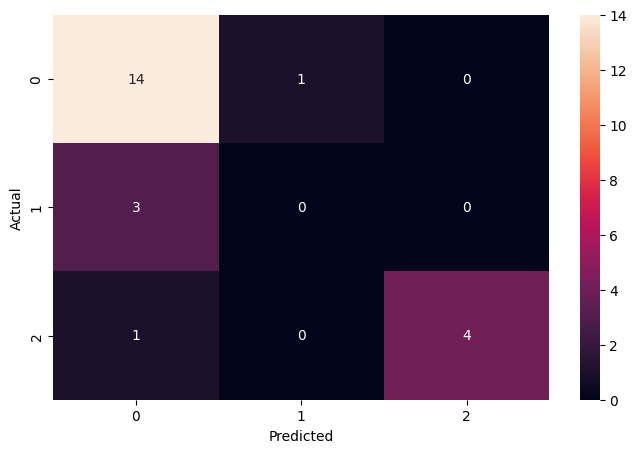

In [100]:
# Display Confusion Matrix Logistic Regression
cm_display_logreg = ConfusionMatrixDisplay(confusion_matrix=CMLogReg)
print('Confusion matrix for Logistic Regression\n', CMLogReg)
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_prediction_logreg), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### KNN

In [101]:
# k-Nearest Neighbors (KNN)
print("k-Nearest Neighbors (KNN)")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_prediction_knn = knn_model.predict(X_test)
accuracy_knn = round(accuracy_score(y_test, y_prediction_knn) * 100, 2)
acc_decision_knn = round(knn_model.score(X_train, y_train) * 100, 2)
print("Prediction k-Nearest Neighbors (KNN): ", y_prediction_knn)


k-Nearest Neighbors (KNN)
Prediction k-Nearest Neighbors (KNN):  [0 0 0 0 0 1 2 1 1 0 0 0 1 2 2 1 0 0 1 0 2 1 0]


In [102]:
# Confusion Matrix k-Nearest Neighbors (KNN)
CMKNN = confusion_matrix(y_test, y_prediction_knn)
accuracy_knn = accuracy_score(y_test, y_prediction_knn)
precision_knn = precision_score(y_test, y_prediction_knn, average='macro')
recall_knn = recall_score(y_test, y_prediction_knn, average='macro')
f1_knn = f1_score(y_test, y_prediction_knn, average='macro')

TNKNN = CMKNN[1][1] * 1.0
FNKNN = CMKNN[1][0] * 1.0
TPKNN = CMKNN[0][0] * 1.0
FPKNN = CMKNN[0][1] * 1.0
total_knn = TNKNN + TPKNN + FPKNN + FNKNN
sensitivity_knn = TNKNN / (TNKNN + FPKNN) * 100
specificity_knn = TPKNN / (TPKNN + FNKNN) * 100

print("Accuracy k-Nearest Neighbors (KNN): ", accuracy_knn * 100, "%")
print("Recall k-Nearest Neighbors (KNN): ", recall_knn * 100, "%")
print("Precision k-Nearest Neighbors (KNN): ", +precision_knn)

Accuracy k-Nearest Neighbors (KNN):  73.91304347826086 %
Recall k-Nearest Neighbors (KNN):  73.33333333333334 %
Precision k-Nearest Neighbors (KNN):  0.7341269841269842


Confusion matrix for k-Nearest Neighbors (KNN)
 [[11  4  0]
 [ 1  2  0]
 [ 0  1  4]]


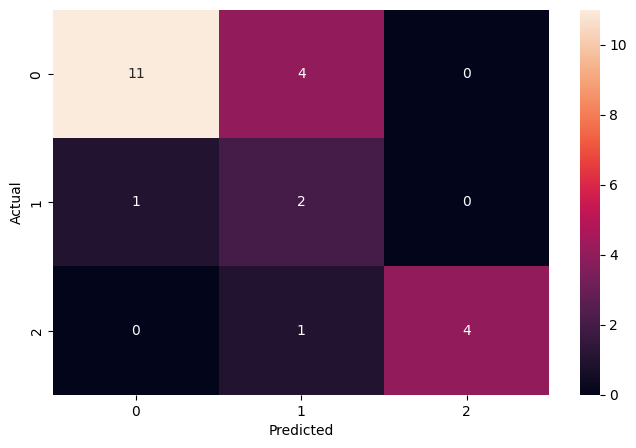

In [103]:
# Display Confusion Matrix k-Nearest Neighbors (KNN)
cm_display_knn = ConfusionMatrixDisplay(confusion_matrix=CMKNN)
print('Confusion matrix for k-Nearest Neighbors (KNN)\n', CMKNN)
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_prediction_knn), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Random Forest

In [104]:
# Random Forest
print("Random Forest")
Forest = RandomForestClassifier(random_state=0)
Forest.fit(X_train, y_train)
y_predictionRF = Forest.predict(X_test)
accuracy_RF = round(accuracy_score(y_test, y_predictionRF)* 100, 2)
acc_DecisionRF = round(Forest.score(X_train, y_train)* 100, 2)
print("Prediksi Random Forest : ", y_predictionRF)

Random Forest
Prediksi Random Forest :  [0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 1 0 2 0 0]


In [105]:
# Confusion Matrix Random Forest
CMRF = confusion_matrix(y_test, y_predictionRF)
accuracyRF = accuracy_score(y_test, y_predictionRF)
precisionRF = precision_score(y_test, y_predictionRF, average='macro')
recallRF = recall_score(y_test, y_predictionRF, average='macro')
f1RF = f1_score(y_test, y_predictionRF, average='macro')

TNRF = CMRF[1][1] * 1.0
FNRF = CMRF[1][0] * 1.0
TPRF = CMRF[0][0] * 1.0
FPRF = CMRF[0][1] * 1.0
total = TNRF + TPRF + FPRF + FNRF
sensitivityRF = TNRF / (TNRF + FPRF)* 100
specificityRF = TPRF / (TPRF + FNRF)* 100

print("Akurasi Random Forest: ", accuracyRF * 100, "%")
print("Recall Random Forest: ", recallRF*100, "%")
print("Precision Random Forest: ", + precisionRF)

Akurasi Random Forest:  86.95652173913044 %
Recall Random Forest:  71.11111111111111 %
Precision Random Forest:  0.9444444444444445


Confusion matrix for Random Forest
 [[15  0  0]
 [ 2  1  0]
 [ 1  0  4]]


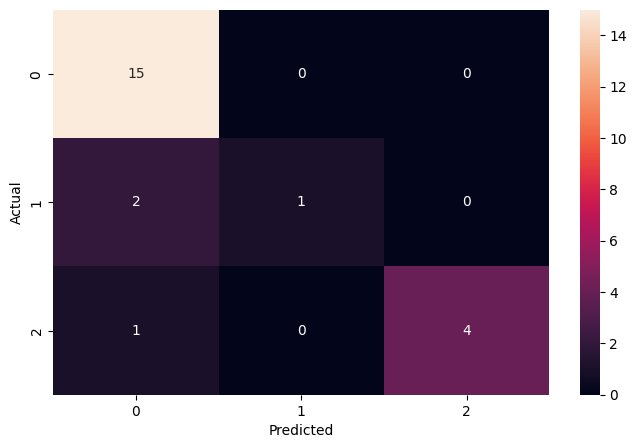

In [106]:
# Menampilkan Confusion Matrix Random Forest
cm_displayRF=ConfusionMatrixDisplay(confusion_matrix=CMRF)
print('Confusion matrix for Random Forest\n',CMRF)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predictionRF), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Naive Bayes

In [107]:
# Naive Bayes
print("Naive Bayes")
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_predictionNB = gaussian.predict(X_test)
accuracy_nb = round(accuracy_score(y_test, y_predictionNB)* 100, 2)
acc_gaussianNB = round(gaussian.score(X_train, y_train)* 100, 2)
print("Prediksi Naive Bayes : ", y_predictionNB)

Naive Bayes
Prediksi Naive Bayes :  [2 0 1 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 2 2 0]


In [108]:
# Confusion Matrix Naive Bayes
CMNB = confusion_matrix(y_test, y_predictionNB)
accuracyNB = accuracy_score(y_test, y_predictionNB)
precisionNB = precision_score(y_test, y_predictionNB, average='macro')
recallNB = recall_score(y_test, y_predictionNB, average='macro')
f1NB = f1_score(y_test, y_predictionNB, average='macro')

TNNB = CMNB[1][1] * 1.0
FNNB = CMNB[1][0] * 1.0
TPNB = CMNB[0][0] * 1.0
FPNB = CMNB[0][1] * 1.0
total = TNNB + TPNB + FPNB + FNNB
sensitivityNB = TNNB / (TNNB + FPNB)* 100
specificityNB = TPNB / (TPNB + FNNB)* 100

print("Akurasi Naive Bayes: ", accuracyNB * 100, "%")
print("Recall Naive Bayes: ", recallNB*100, "%")
print("Precision Naive Bayes: ", + precisionNB)

Akurasi Naive Bayes:  43.47826086956522 %
Recall Naive Bayes:  44.44444444444444 %
Precision Naive Bayes:  0.3819444444444445


Confusion matrix for Naive Bayes
 [[5 1 9]
 [1 0 2]
 [0 0 5]]


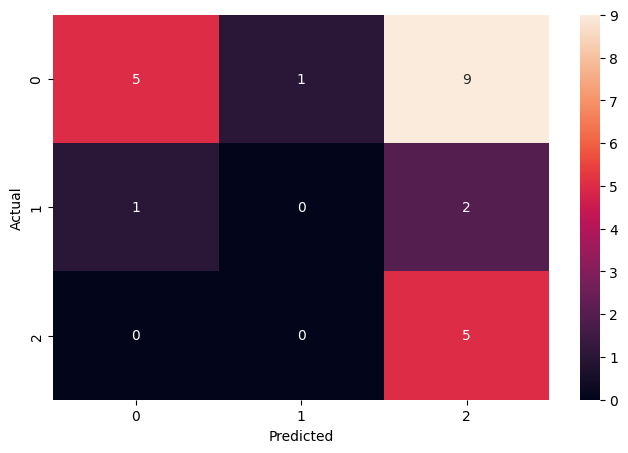

In [109]:
# Menampilkan Confusion Matrix Naive Bayes
cm_displayNB=ConfusionMatrixDisplay(confusion_matrix=CMNB)
print('Confusion matrix for Naive Bayes\n',CMNB)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predictionNB), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()